# Analise de dados de Concentração de gás

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions

# Classes dos modelo
#from sklearn.linear_model import LogisticRegression, LinearRegression
# Classes do modelo
from sklearn.neighbors import KNeighborsClassifier

# Funções de avaliação dos modelos
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# sns.set_theme(style="whitegrid")

### Carregando o dataset

In [40]:
dataset = pd.read_csv("CONCENTRAÇAO_GAS.csv")
#dataset.head(5)



In [41]:
# normalizando o dataset:
X = dataset.drop(["Class"], axis=1)
X_norm = (X - X.min())/ ( X.max() - X.min()) 
X_norm.head()
y = dataset["Class"].copy() # copia a coluna de classes


## Treinamento do modelo KNN

In [42]:

X_train, X_test, y_train, y_test = train_test_split(X_norm.values, y.values, test_size=0.30, random_state=199)

# vamos criar um classificador kNN:
model_knn = KNeighborsClassifier(n_neighbors=7)
model_knn.fit(X_train, y_train)

# e ver a sua performance no dataset de teste
print(classification_report(y_test, model_knn.predict(X_test)))




              precision    recall  f1-score   support

           1       0.99      0.99      0.99       779
           2       1.00      0.99      1.00       881
           3       1.00      1.00      1.00       530
           4       1.00      0.99      0.99       581
           5       0.99      0.99      0.99       917
           6       0.97      1.00      0.98       485

    accuracy                           0.99      4173
   macro avg       0.99      0.99      0.99      4173
weighted avg       0.99      0.99      0.99      4173



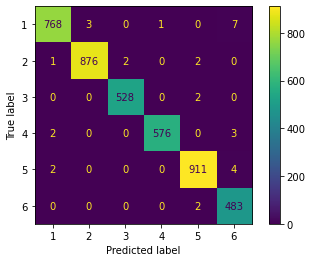

In [43]:
# MATRIZ CONFUSÃO: retorna uma matriz com a contagem de como cada uma das classes está sendo classificada corretamente ou erroneamente
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

plot_confusion_matrix(model_knn, X_test, y_test)

In [44]:
# curva roc:
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
#from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score




    


# VALIDAÇÃO DO MODELO:

In [45]:
#na função _train_testsplit é o stratify. Ele controla se a proporção das classes no dataset de treino e 
# teste deve ser mantida e tenta selecionar as instâncias que estão faltando para se aproximar da distribuição original.


def print_distribution(arr, print_nl=True):
    arr = np.unique(arr, return_counts=True)[1] / arr.count()
    for i in range(arr.shape[0]):
        print("Classe %d: %.2f%%" %(i, arr[i]*100))

    if print_nl:
        print("\n")

_, _, y_train, _ = train_test_split(X_norm, y, test_size=0.3, random_state=199)
_, _, y_train_strat, _ = train_test_split(X_norm, y, test_size=0.3, random_state=199, stratify=y)

print("Proporções por classe no dataset em geral:")
print_distribution(y)

print("Proporções por classe no dataset de treino sem estratificação:")
print_distribution(y_train)

print("Proporções por classe no dataset de treino com estratificação:")
print_distribution(y_train_strat, print_nl=False)

Proporções por classe no dataset em geral:
Classe 0: 18.44%
Classe 1: 21.04%
Classe 2: 11.80%
Classe 3: 13.92%
Classe 4: 21.63%
Classe 5: 13.18%


Proporções por classe no dataset de treino sem estratificação:
Classe 0: 18.34%
Classe 1: 21.00%
Classe 2: 11.41%
Classe 3: 13.92%
Classe 4: 21.49%
Classe 5: 13.84%


Proporções por classe no dataset de treino com estratificação:
Classe 0: 18.45%
Classe 1: 21.03%
Classe 2: 11.80%
Classe 3: 13.92%
Classe 4: 21.63%
Classe 5: 13.18%


In [50]:
from sklearn.model_selection import StratifiedKFold

print("Proporções por classe no dataset em geral:")
print_distribution(y)

kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=199)
fold = 0
for train, test in kf.split(X, y):
    print("Fold %d" %(fold))
    print_distribution(y[train], print_nl=(fold != 2))
    fold += 1

Proporções por classe no dataset em geral:
Classe 0: 18.44%
Classe 1: 21.04%
Classe 2: 11.80%
Classe 3: 13.92%
Classe 4: 21.63%
Classe 5: 13.18%


Fold 0
Classe 0: 18.44%
Classe 1: 21.03%
Classe 2: 11.80%
Classe 3: 13.91%
Classe 4: 21.64%
Classe 5: 13.18%


Fold 1
Classe 0: 18.44%
Classe 1: 21.03%
Classe 2: 11.80%
Classe 3: 13.91%
Classe 4: 21.63%
Classe 5: 13.18%


Fold 2
Classe 0: 18.44%
Classe 1: 21.03%
Classe 2: 11.80%
Classe 3: 13.91%
Classe 4: 21.63%
Classe 5: 13.18%
Fold 3
Classe 0: 18.44%
Classe 1: 21.03%
Classe 2: 11.80%
Classe 3: 13.91%
Classe 4: 21.63%
Classe 5: 13.18%


Fold 4
Classe 0: 18.44%
Classe 1: 21.03%
Classe 2: 11.80%
Classe 3: 13.91%
Classe 4: 21.63%
Classe 5: 13.18%


Fold 5
Classe 0: 18.44%
Classe 1: 21.03%
Classe 2: 11.80%
Classe 3: 13.91%
Classe 4: 21.63%
Classe 5: 13.18%


Fold 6
Classe 0: 18.44%
Classe 1: 21.04%
Classe 2: 11.79%
Classe 3: 13.92%
Classe 4: 21.63%
Classe 5: 13.18%


Fold 7
Classe 0: 18.44%
Classe 1: 21.04%
Classe 2: 11.80%
Classe 3: 13.92%
Cla

In [51]:
from sklearn.model_selection import StratifiedKFold

evaluate_model_with_kfold(StratifiedKFold(n_splits=10, shuffle=True, random_state=199))

Acurácia média (desvio): 0.9926 +- (0.0000)
